<a href="https://colab.research.google.com/github/PedroSAP/Covid19_Genes_Tracker/blob/main/Covid19_Genes_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Covid19_Genes_Tracker**
By: Pedro Pires (master's student of Bioinformatics and Computational Biology)

This project's primary purpose is to visualize the frequency of polymorphisms in the Sars-CoV-2 genome from the 10 nations with the most frequently reported mutations numbers.

To do this task, the following packages are required as below. 

In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)
install.packages("openxlsx")
install.packages("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Import the data about Sars-CoV-2 polymorphisms on its genome. 

In [6]:
CV19_GenoSamples <- read.csv("/content/covid19-genomics-dataset.csv")
CV19_GenoSamples

Country,Date,Mutation,Gene,Consequence
<chr>,<chr>,<chr>,<chr>,<chr>
USA,2020-9,8782C>T,ORF1A,Synonymous
USA,2020-9,17747C>T,ORF1B,Missense
USA,2020-9,17858A>G,ORF1B,Missense
USA,2020-9,18060C>T,ORF1B,Synonymous
USA,2020-9,28144T>C,ORF8,Missense
USA,2020-9,241C>T,other,Upstream gene
USA,2020-9,1059C>T,ORF1A,Missense
USA,2020-9,3037C>T,ORF1A,Synonymous
USA,2020-9,14408C>T,ORF1B,Missense


The next step is to remove blank/missing values rows and to rename all Genes with frequencies below the threshold of 0.05 (5%) to "others". After that, only the 10 most sampled countries are selected. Finally, the relative frequencies of mutations on Sars-CoV-2 genome are assigned to both "Perc" and "label" variables.

In [13]:
C19_top_10 <- CV19_GenoSamples %>% add_count(Country) %>% group_by(Country, Gene) %>% dplyr::mutate(Gene = na_if(Gene, ""), Gene = case_when(length(Gene)/n <= 0.05 ~ "other", TRUE ~ Gene)) %>% filter(!is.na(Gene)) %>% ungroup() %>%
 filter(dense_rank(desc(n)) <= 10) %>%
 group_by(Country, Gene) %>%
  dplyr::mutate(Perc = n()/ n, label = gsub('^[0](\\.\\d{1,2}).*', '\\1', round(Perc, digits = 2))) 
 C19_top_10

Country,Date,Mutation,Gene,Consequence,n,Perc,label
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>
USA,2020-9,8782C>T,ORF1A,Synonymous,56866,0.31023810,.31
USA,2020-9,17747C>T,ORF1B,Missense,56866,0.23201913,.23
USA,2020-9,17858A>G,ORF1B,Missense,56866,0.23201913,.23
USA,2020-9,18060C>T,ORF1B,Synonymous,56866,0.23201913,.23
USA,2020-9,28144T>C,other,Missense,56866,0.24140963,.24
USA,2020-9,241C>T,other,Upstream gene,56866,0.24140963,.24
USA,2020-9,1059C>T,ORF1A,Missense,56866,0.31023810,.31
USA,2020-9,3037C>T,ORF1A,Synonymous,56866,0.31023810,.31
USA,2020-9,14408C>T,ORF1B,Missense,56866,0.23201913,.23


The data is ready to be plotted. With ggplot2 package, we can check the Relative frequency of each gene of Sars-CoV-2 by country.

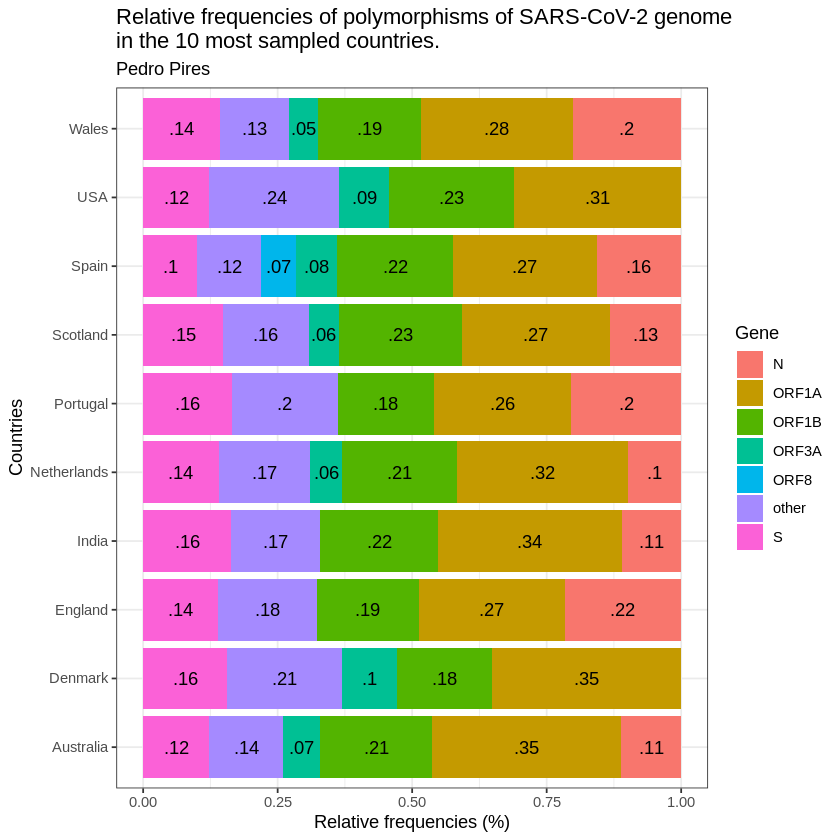

In [14]:
plot_C19_Genes <- ggplot(C19_top_10 %>% group_by(Country, Gene) %>% dplyr::filter(row_number() == 1), aes(x = Country, y = Perc, fill = Gene)) + 
  geom_bar(stat = "identity", position = "stack") +
  geom_text(aes(label = label), position = position_fill(vjust = 0.5), check_overlap = TRUE) +
  coord_flip() +
  theme_bw() +
  labs(x = "Countries", y = "Relative frequencies (%)", colour = "Genes", title = "Relative frequencies of polymorphisms of SARS-CoV-2 genome \nin the 10 most sampled countries.", subtitle = "Pedro Pires")
plot_C19_Genes

   

